In [26]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [27]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# CWD file path
import os

from apyori import apriori
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
cd = os.getcwd()
cd

'C:\\Users\\pkala'

In [115]:
CrimeData = pd.read_csv(cd+"/State Crime Data.csv",index_col=0)

In [116]:
CrimeData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [117]:
CrimeData.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [118]:
CrimeData.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [119]:
#standardize the data to normal distribution
from sklearn import preprocessing
crime_rates_standardized = preprocessing.scale(CrimeData)
print(crime_rates_standardized)
crime_rates_standardized = pd.DataFrame(crime_rates_standardized)

[[ 1.25517927  0.79078716 -0.52619514 -0.00345116]
 [ 0.51301858  1.11805959 -1.22406668  2.50942392]
 [ 0.07236067  1.49381682  1.00912225  1.05346626]
 [ 0.23470832  0.23321191 -1.08449238 -0.18679398]
 [ 0.28109336  1.2756352   1.77678094  2.08881393]
 [ 0.02597562  0.40290872  0.86954794  1.88390137]
 [-1.04088037 -0.73648418  0.79976079 -1.09272319]
 [-0.43787481  0.81502956  0.45082502 -0.58583422]
 [ 1.76541475  1.99078607  1.00912225  1.1505301 ]
 [ 2.22926518  0.48775713 -0.38662083  0.49265293]
 [-0.57702994 -1.51224105  1.21848371 -0.11129987]
 [-1.20322802 -0.61527217 -0.80534376 -0.75839217]
 [ 0.60578867  0.94836277  1.21848371  0.29852525]
 [-0.13637203 -0.70012057 -0.03768506 -0.0250209 ]
 [-1.29599811 -1.39102904 -0.5959823  -1.07115345]
 [-0.41468229 -0.67587817  0.03210209 -0.34856705]
 [ 0.44344101 -0.74860538 -0.94491807 -0.53190987]
 [ 1.76541475  0.94836277  0.03210209  0.10439756]
 [-1.31919063 -1.06375661 -1.01470522 -1.44862395]
 [ 0.81452136  1.56654403  0.10

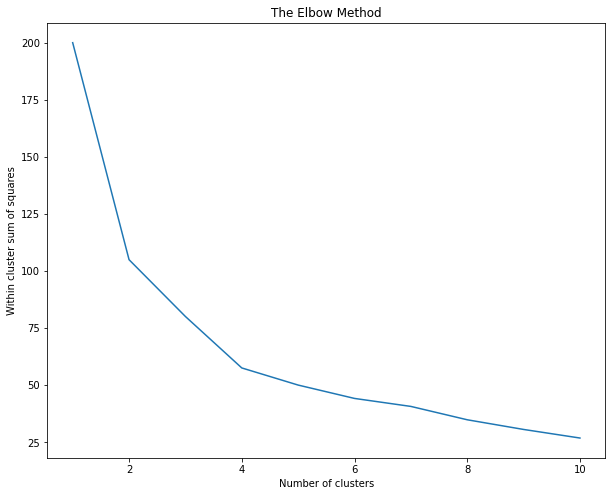

In [121]:
# K-means Clustering
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(crime_rates_standardized)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()

In [89]:
X = K_Cluster.iloc[:, [1,2]].values # Add Murder/Rape to our data
#X = K_Cluster
X

array([[ 13.2, 236. ],
       [ 10. , 263. ],
       [  8.1, 294. ],
       [  8.8, 190. ],
       [  9. , 276. ],
       [  7.9, 204. ],
       [  3.3, 110. ],
       [  5.9, 238. ],
       [ 15.4, 335. ],
       [ 17.4, 211. ],
       [  5.3,  46. ],
       [  2.6, 120. ],
       [ 10.4, 249. ],
       [  7.2, 113. ],
       [  2.2,  56. ],
       [  6. , 115. ],
       [  9.7, 109. ],
       [ 15.4, 249. ],
       [  2.1,  83. ],
       [ 11.3, 300. ],
       [  4.4, 149. ],
       [ 12.1, 255. ],
       [  2.7,  72. ],
       [ 16.1, 259. ],
       [  9. , 178. ],
       [  6. , 109. ],
       [  4.3, 102. ],
       [ 12.2, 252. ],
       [  2.1,  57. ],
       [  7.4, 159. ],
       [ 11.4, 285. ],
       [ 11.1, 254. ],
       [ 13. , 337. ],
       [  0.8,  45. ],
       [  7.3, 120. ],
       [  6.6, 151. ],
       [  4.9, 159. ],
       [  6.3, 106. ],
       [  3.4, 174. ],
       [ 14.4, 279. ],
       [  3.8,  86. ],
       [ 13.2, 188. ],
       [ 12.7, 201. ],
       [  3

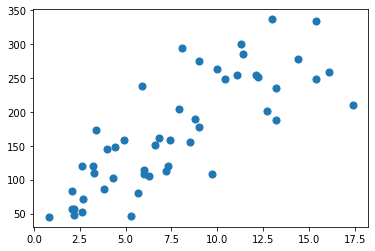

In [90]:
#plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.scatter(X[:, 0], X[:, 1], s=50,label='unclustered data');

In [126]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(crime_rates_standardized)

y_kmeans

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [127]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
CrimeData['cluster'] = cluster

In [128]:
#Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(CrimeData.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,13.9,243.6,53.8,21.4
2,5.7,138.9,73.9,18.8
3,3.6,78.5,52.1,12.2
4,10.8,257.4,76.0,33.2


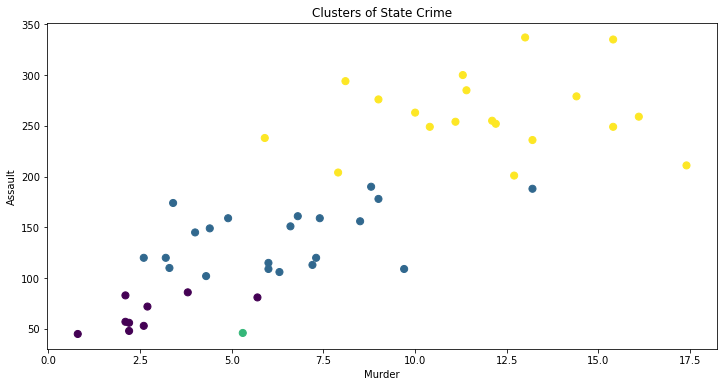

In [148]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
kmeans.n_iter_
plt.figure(figsize=(12,6))
plt.scatter(x=CrimeData['Murder'], y = CrimeData['Assault'], c=labels, s=50,cmap='viridis');
plt.title('Clusters of State Crime')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()

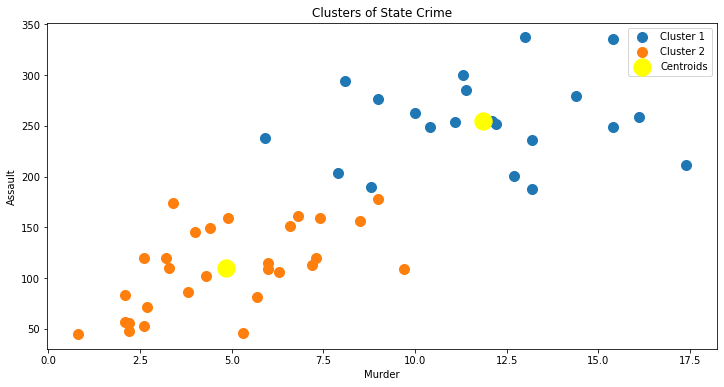

In [161]:
# Visualising the clusters
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, label = 'Cluster 3')

plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=300,label = 'Centroids');
plt.title('Clusters of State Crime')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.legend()
plt.show()


In [156]:
#States in cluster 1
CrimeData[CrimeData['cluster']==2]

,Murder,Assault,UrbanPop,Rape,cluster
State,,,,,
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,2
Hawaii,5.3,46,83,20.2,2
Indiana,7.2,113,65,21.0,2
Kansas,6.0,115,66,18.0,2
Massachusetts,4.4,149,85,16.3,2
New_Jersey,7.4,159,89,18.8,2
Ohio,7.3,120,75,21.4,2
Oklahoma,6.6,151,68,20.0,2
